<a href="https://colab.research.google.com/github/Debraj-80/CardioPredict-Machine-Learning-Based-Heart-Disease-Prediction-System/blob/main/heart_disease_prediction_improved_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset Loaded Successfully!
Shape: (303, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:50:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:50:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:50:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:50:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


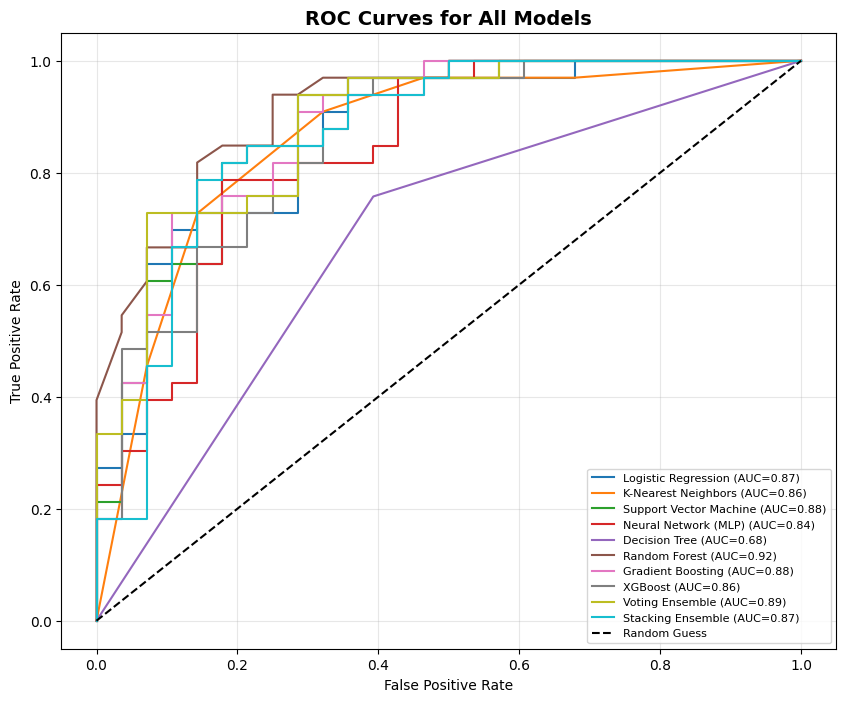


📊 Model Performance Summary:



,Accuracy,ROC-AUC
Random Forest,83.61%,0.916
Voting Ensemble,81.97%,0.887
Support Vector Machine,81.97%,0.883
Gradient Boosting,81.97%,0.879
Logistic Regression,80.33%,0.869
Stacking Ensemble,80.33%,0.868
K-Nearest Neighbors,80.33%,0.863
XGBoost,80.33%,0.856
Neural Network (MLP),73.77%,0.842
Decision Tree,68.85%,0.682



🔮 Predicting for a New Patient Input...

+------------------------+-------------+------------+
|         Model          | Probability | Prediction |
+------------------------+-------------+------------+
|  Logistic Regression   |    0.708    | 💔 Disease |
|  K-Nearest Neighbors   |    0.400    | ✅ Healthy |
| Support Vector Machine |    0.651    | 💔 Disease |
|  Neural Network (MLP)  |    0.973    | 💔 Disease |
|     Decision Tree      |    1.000    | 💔 Disease |
|     Random Forest      |    0.830    | 💔 Disease |
|   Gradient Boosting    |    0.968    | 💔 Disease |
|        XGBoost         |    0.954    | 💔 Disease |
|    Voting Ensemble     |    0.858    | 💔 Disease |
|   Stacking Ensemble    |    0.480    | ✅ Healthy |
+------------------------+-------------+------------+


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


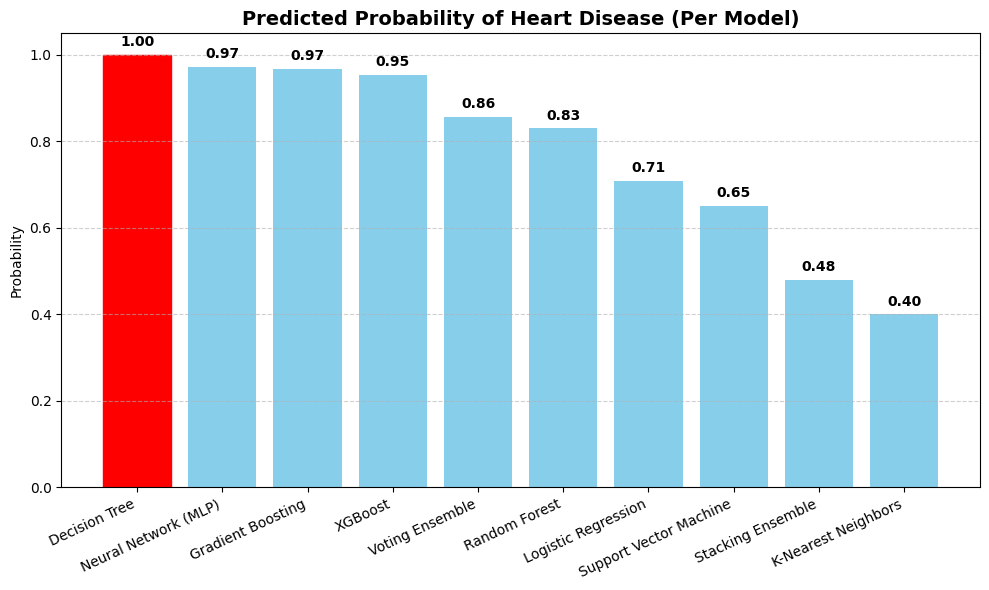


✅ Analysis Complete! Project Ready for Submission & Publication.


In [2]:
# ================================================================
# 💖 Heart Disease Prediction using Multiple Machine Learning Models
# Author: Debraj Saha
# ================================================================

# ================== Import Dependencies ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    VotingClassifier,
    StackingClassifier
)
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_auc_score, roc_curve
)
from xgboost import XGBClassifier

# ================== Load Dataset ================================
url = "https://raw.githubusercontent.com/Debraj-80/CardioPredict-Machine-Learning-Based-Heart-Disease-Prediction-System/e960ce3386591a693d9ad3f7545a85a8a1491c4b/heart.csv"
df = pd.read_csv(url)

print("✅ Dataset Loaded Successfully!")
print(f"Shape: {df.shape}\n")
display(df.head())

# ================== Data Preparation ============================
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ================== Define Models ===============================
base_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Neural Network (MLP)": MLPClassifier(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Ensemble Models
voting_clf = VotingClassifier(
    estimators=[
        ("lr", LogisticRegression(max_iter=1000)),
        ("rf", RandomForestClassifier()),
        ("xgb", XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ],
    voting="soft"
)

stacking_clf = StackingClassifier(
    estimators=[
        ("lr", LogisticRegression(max_iter=1000)),
        ("rf", RandomForestClassifier()),
        ("xgb", XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ],
    final_estimator=GradientBoostingClassifier()
)

base_models["Voting Ensemble"] = voting_clf
base_models["Stacking Ensemble"] = stacking_clf

# ================== Train & Evaluate Models =====================
results = {}
plt.figure(figsize=(10, 8))
plt.title("ROC Curves for All Models", fontsize=14, fontweight="bold")

for name, model in base_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    results[name] = {"Accuracy": acc, "ROC-AUC": auc}

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize=8)
plt.grid(alpha=0.3)
plt.show()

# ================== Summary Table ===============================
results_df = pd.DataFrame(results).T.sort_values("ROC-AUC", ascending=False)
results_df["Accuracy"] = results_df["Accuracy"].apply(lambda x: f"{x*100:.2f}%")
results_df["ROC-AUC"] = results_df["ROC-AUC"].apply(lambda x: f"{x:.3f}")

print("\n📊 Model Performance Summary:\n")
display(results_df.style.set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#0077b6'),
                                  ('color', 'white'),
                                  ('font-weight', 'bold')]}]
).background_gradient(subset=["ROC-AUC"], cmap="YlGn"))

# ================== Predict for New Patient =====================
print("\n🔮 Predicting for a New Patient Input...\n")
new_patient = np.array([[37, 1, 2, 130, 250, 0, 1, 187, 0, 3.5, 0, 0, 2]])
scaled_patient = scaler.transform(new_patient)

patient_probs = {}
for name, model in base_models.items():
    prob = model.predict_proba(scaled_patient)[0][1]
    patient_probs[name] = prob

table = PrettyTable()
table.field_names = ["Model", "Probability", "Prediction"]

for model, prob in patient_probs.items():
    prediction = "💔 Disease" if prob >= 0.5 else "✅ Healthy"
    table.add_row([model, f"{prob:.3f}", prediction])

print(table)

# ================== Visualization for Patient ===================
patient_df = pd.DataFrame({
    "Model": list(patient_probs.keys()),
    "Probability": list(patient_probs.values())
}).sort_values(by="Probability", ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(patient_df["Model"], patient_df["Probability"], color="skyblue")
bars[0].set_color("red")

plt.title("Predicted Probability of Heart Disease (Per Model)", fontsize=14, fontweight="bold")
plt.ylabel("Probability")
plt.xticks(rotation=25, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)

for i, prob in enumerate(patient_df["Probability"]):
    plt.text(i, prob + 0.02, f"{prob:.2f}", ha="center", fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()

print("\n✅ Analysis Complete! Project Ready for Submission & Publication.")
